# Hypothesis Testing

__Agenda__

- Hypothesis Testing - Why do we need them?
- One or two tailed hypothesis testing? Which one we should use, when?
- Discussion of significance level. It's effect on our study.
- Diagnosis and understanding of possible mistakes of the study.
- Seeing hypothesis testing in action

# Scenario

Below you will be loading the simulated salaries of 100 Flatiron School Data Science graduates. Let's say we know that the average salary for all data science bootcamp graduates is 82k and the standard deviation is 10k. Now we would like to understand whether Flatiron School graduates are making more money than other bootcamp graduates.

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sample = pd.read_pickle('data/flatiron_salary.pickle')

In [10]:
sample

array([ 94.78305321, 104.64742151,  85.7273457 , 107.98604118,
        79.25260848,  86.76697797,  70.52945389, 118.8917496 ,
        80.35276908, 103.22260038,  98.87787849,  79.41331011,
        96.03179302,  87.09659424,  69.12398114,  58.14443583,
        83.06560056,  79.19904081,  84.1428429 ,  71.40325889,
        59.24910462,  83.7430567 , 101.73552911,  88.10934101,
       102.48233727,  67.04022866,  61.9926587 ,  81.83048611,
        71.83954513,  58.87389381, 102.14986462, 106.87664632,
        65.20245418,  85.83780022,  70.88576526,  91.47114006,
        83.20650791,  74.69236676, 100.83131506,  98.52340375,
        65.91100027,  89.9373218 ,  74.30974709,  59.98954071,
        66.40541303, 101.2245614 ,  70.01311218,  93.90607008,
        64.27127922,  85.07735216,  54.11453229,  55.74645221,
        92.30125958,  40.18640402,  99.49078267, 100.36034139,
        60.84405093,  78.75650857, 117.11454678,  80.93163031,
        61.98959758, 105.54573002,  69.47257413,  89.63

In [13]:
# Fudging data
sample = sample *0.95

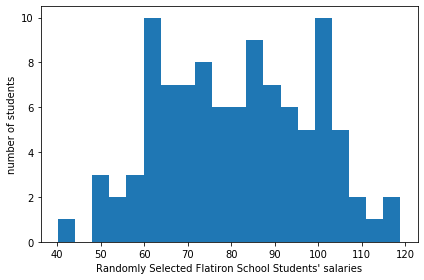

In [8]:
plt.hist(sample, bins=20)

plt.xlabel("Randomly Selected Flatiron School Students' salaries")
plt.ylabel('number of students')

plt.tight_layout()


A hypothesis test consists of several stages:

1. Hypothesis: also known as the research hypothesis or __alternative hypothesis__ ($H_{a}$). In our case, we hypothesize that the Flatiron School Data Science graduates are earning a higher salary than other data science bootcamp graduates.
3. Set-up the __null hypothesis__ ($H_{0}$) that our sample is in fact drawn from a population with the same mean as national bootcamp population. (Naively we can say "there is no difference between a Flatiron Student graduate's salary and the national bootcamp average.")
4. Set significance level $\alpha$ (which is usually 0.05 in social studies).
5. Construct the sampling distribution of the particular statistic on the assumption that $H_{0}$ is true.
6. Compare the sample statistic to that distribution. Find a the probability of getting the sample mean under the null-hypothesis assumption.
7. Reject or retain $H_{0}$ based on the $\alpha$ you've chosen

Now let's check the sample mean

In [14]:
x_bar = sample.mean()
x_bar

83.38776089740225

# Null and Alternative Hypotheses



## Alternative Hypothesis ($H_{a}$)
<img src="img/giphy.gif" width="350">

- claims the difference in the results due to the independent variable (FS in this case)

- Alternative can be directional or non-directional. (More salary, Less salary or just different)

$H_a$: The average salary for the FS-DS graduates is higher than the national DS bootcamp graduates average.

## Null Hypothesis ($H_{0}$)

$H_{0}$: The FS-DS graduates average salary is not different or less than the national DS bootcamp graduates avereage salary.

- $H_0$ should be logical complement of $H_{a}$.

- That is to say: If Alternative is bidirectional than null-hypothesis claims no relation between independent and dependent variables

- Alternative is directional (say claims a positive relation) then null claims there is no positive relation which means no effect or an effect in the opposite direction of the Alternative hypothesis.

## Significance Level ($\alpha$)

Basically setting how unlikely is too unlikely. Usually we will set is to $\alpha = 0.05$


- p-value: if $H_{0}$ would be true what is the probability of getting such experiment results by just chance. 

- If this probability is less than a critical pre-determined level $\alpha$ (significance level - $\alpha$ - value) then we reject the null hypothesis.

- If the obtained probability $p_{value} \leq \alpha$: reject $H_{0}$

- If the obtained probability $p_{value} \geq \alpha$: fail to reject $H_{0}$, retain $H_{0}$

- Usually $\alpha = 0.05$ - Let's talk what it means in action?

# Continue the Scenario

Note that we have found that x_bar = 83.4. What would be the sampling distribution of the means? Central limit theorem is in our help here.

In [16]:
# population mean and std dev:
mu = 82
sigma = 10

## sample size
n = len(sample)

## The mean of the sampling mean distribution
## Under the Null-Hypothesis it should be national average
sample_mean = mu

# we scale the sigma by the size of our sample.
std_error = sigma/np.sqrt(n)

In [18]:
std_error

1.0

Here I will plot the sampling distribution of the means. Don't try to understand the code. Instead focus on the figure itself.

In [17]:
stats.norm.pdf(mu, loc=mu, scale=sigma)

0.03989422804014327

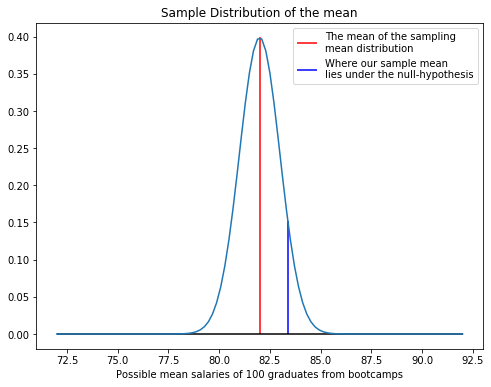

In [19]:
plt.figure(figsize=(8, 6))
xsample = np.linspace(72, 92, 100)
ysample = stats.norm.pdf(xsample, loc=mu,
                         scale=std_error)

plt.plot(xsample, ysample)
plt.vlines(x=mu, ymin=0, ymax=stats.norm.pdf(mu,
                                             loc=mu, scale=std_error),
           label="The mean of the sampling\nmean distribution", color='red')
# red line of global mean

plt.vlines(x=x_bar, ymin=0, ymax=stats.norm.pdf(x_bar,
                                                loc=mu, scale=std_error),
           label="Where our sample mean\nlies under the null-hypothesis", color='blue')
# blue line: our sample mean 

plt.hlines(y=0, xmin=72, xmax=92, color='k')

plt.xlabel('Possible mean salaries of 100 graduates from bootcamps')


plt.title('Sample Distribution of the mean')
plt.legend(loc='upper right')
plt.show()

# light blue bell curve: if we believe null hypothesis, this is how the sample mean distribution should look like.

Now let find p_value: What is the probability of x_bar = 83.40 and higher if the null-hypothesis is correct?

To solve this problem we will calculate z_score: $\large\frac{\bar{x} - \mu}{se}$

In [20]:
z_score = (x_bar - mu) / std_error
z_score

1.387760897402245

In [21]:
# Defining a std normal function:
std_norm = stats.norm(loc=0, scale=1)

In [26]:
std_norm

In [22]:
# the .cdf() gets us the area under the curve for the z-score. 
std_norm.cdf(z_score)

0.9173950672730432

In [23]:
# p_value
1 - std_norm.cdf(z_score)

0.08260493272695679

In [24]:
# also:
# sf = survival function = 1 - cdf
std_norm.sf(z_score)

0.08260493272695679

$0.0826 !< \alpha$ (0.05) therefore we can NOT reject the null_hypothesis. We can NOT accept the alternative explanation which is FS - DS graduates are on average having more salary

In [25]:
# Another way of applying z-test in python is
# stats.norm(loc=82, scale=1).sf(84.68)
stats.norm(loc=mu, scale=std_error).sf(x_bar)

0.08260493272695679

## Another Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 25 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

In [ ]:
# No difference between all African elephants and Gabonese elephants. 

What is our alternative hypothesis here?

In [ ]:
# Gabonese elephants have a different average weight (look at lower and higher) than all African elephants. 

Let's set a threshold value of $p = 0.05$ for rejecting the null hypothesis.

The standard error for our sample is:
$\large\frac{\sigma}{\sqrt{n}} = \frac{900}{\sqrt{25}} = 180$.

In [29]:
900/np.sqrt(25)

180.0

The z-score will be: $\large\frac{\bar{x} - \mu}{se} = \frac{8637 - 9000}{180} = -\frac{363}{180} = -2.02$.

In [31]:
(8637-9000)/180

-2.0166666666666666

In [33]:
# calculate the survival function of your z-score!
stats.norm().cdf(-2.0167)

0.021863414970438016

In [37]:
stats.norm().cdf(z_score)

0.9173950672730432

In [35]:
# multiply by 2 to get two-tailed test.
stats.norm(loc = 9000, scale = 180).cdf(8637)*2

0.04373031073585997

The "area of the tail" corresponding to this z-score is only 2.2%. The area for both tails is thus 4.4%, still less than our 5% threshold value.

Thus we ought to reject the null hypothesis and conclude that the Gabonese elephants are statistically significant!

## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

### A Function

Suppose I start flipping the same coin twice a day. What I'm curious about is whether the coin is fair or not.

My null hypothesis will be that there is "nothing to see here", i.e. that the coin is after all fair. The alternative hypothesis will of course be that the coin is not.

- **NH**: The coin is fair.
- **AH**: The coin is biased.

My statistical test will consist of flipping the coin a number of times and looking at those flips' results.

If the coin is fair, then my test will result either in a true negative (accurate) or a false positive (inaccurate). If the coin is biased, then the test will result either in a true positive (accurate) or a false negative (inaccurate).

Suppose that I set my value for $\beta$. What I want to understand is how the threshold for rejection of the null hypothesis varies as a function of $\beta$ and of the number of tosses $k$ that come up "heads".

I want to write a function that will tell me, given inputs for $p$ and $k$, how many tosses I would need to make before I should reject the null hypothesis.

We'll use the ```.binom_test()``` method in scipy's stats module.

In [ ]:
def reject_null(k, beta=0.05, p=0.5, test_alternative='less'):
    n = k # starting the number of trials at the number of successes
    
    pct = stats.binom_test(k, n, p, alternative=test_alternative)
    while pct >= beta:
        n += 1
        pct = stats.binom_test(k, n, p, alternative=test_alternative)
    return n

In [ ]:
# Let's test it out!

reject_null(1, beta=0.1, p=0.5)